In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1 data list for storing image data in numpy array form

2 paths list for storing paths of all images

3 result list for storing one hot encoded form of target class whether normal or tumor


In [4]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'dataset/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"dataset/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [5]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing¶


In [6]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test) )

Epoch 1/30
3/3 [==============================] - 6s 1s/step - loss: 16.0360 - accuracy: 0.5338 - val_loss: 25.4958 - val_accuracy: 0.7143
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 21.5252 - accuracy: 0.6476 - val_loss: 124.5977 - val_accuracy: 0.5357
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 18.6583 - accuracy: 0.6701 - val_loss: 24.7692 - val_accuracy: 0.7143
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 8.5700 - accuracy: 0.8026 - val_loss: 7.2723 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 3s 1s/step - loss: 5.3007 - accuracy: 0.7825 - val_loss: 19.1174 - val_accuracy: 0.6786
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.0564 - accuracy: 0.9098 - val_loss: 33.3754 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 2.7431 - accuracy: 0.9265 - val_loss: 35.3772 - val_accuracy: 0.6429
Epoch 8/30
3/3 [===============

# Checking Model

In [18]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence  No, Its not a tumor


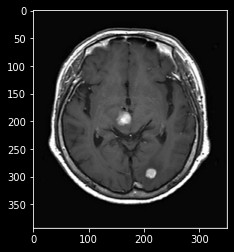

In [23]:
from matplotlib.pyplot import imshow
img = Image.open(r"dataset/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))

100.0% Confidence  Its a Tumor


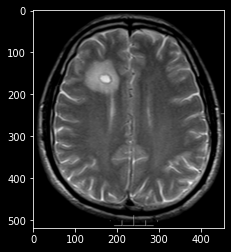

In [24]:
from matplotlib.pyplot import imshow
img = Image.open(r"dataset/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))

In [25]:
model.save('models/brain_tumor.h5')